In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw

In [18]:
random_state = 42

In [2]:
data = pd.read_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\S&S_SZD\Project_Data_EE4C12_S&S_SZD.csv')
data

,Patient,annotation,min|FP1-F7,min|F7-T3,min|T3-T5,min|T5-O1,min|FP2-F8,min|F8-T4,min|T4-T6,min|T6-O2,...,norm_power_HF|CZ-C4,norm_power_HF|C4-T4,norm_power_HF|FP1-F3,norm_power_HF|F3-C3,norm_power_HF|C3-P3,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
0,258,1,50,61,57,53,39,35,39,35,...,0.016087,0.066920,0.102402,0.481384,0.690787,0.154544,0.062533,0.046460,0.066575,0.086999
1,258,1,48,62,60,46,38,35,39,33,...,0.024006,0.064857,0.031791,0.225788,0.409987,0.184671,0.071133,0.022369,0.079494,0.047536
2,258,1,51,60,59,45,38,36,40,36,...,0.037326,0.100177,0.050009,0.622584,0.394504,0.225516,0.050673,0.044906,0.102142,0.068105
3,258,1,49,58,56,42,36,36,41,37,...,0.027546,0.107883,0.014017,0.359140,0.276964,0.104977,0.018042,0.079467,0.078255,0.089385
4,258,1,45,57,61,41,35,37,41,37,...,0.036820,0.182520,0.031397,0.328354,0.156929,0.151952,0.047532,0.135071,0.098320,0.137701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55451,11580,-1,75,73,81,80,66,80,77,75,...,0.244334,0.625396,0.023821,0.058277,0.083594,0.114426,0.119654,0.295364,0.185930,0.199585
55452,11580,-1,74,74,77,71,79,75,82,77,...,0.588236,0.743060,0.076294,0.332341,0.228458,0.170603,0.351418,0.638666,0.490806,0.307429
55453,11580,-1,72,76,72,73,74,76,80,76,...,0.296041,0.770194,0.041190,0.090919,0.186074,0.216797,0.231053,0.770637,0.285257,0.413382
55454,11580,-1,77,82,74,75,82,85,80,76,...,0.440360,0.720855,0.026959,0.026340,0.077674,0.269610,0.186769,0.790173,0.473615,0.415771


In [3]:
Patient_count = data['Patient'].value_counts(sort=False)

In [4]:
Patient_count

258        522
8889      3682
9578      4184
10158     1240
5804      1272
6175      4064
10418    13120
10591      996
11333     6480
5371      3365
4456      4069
6563      1965
10020     1452
6514      1786
11580     7259
Name: Patient, dtype: int64

In [5]:
Patient_ID = Patient_count.index.values
Patient_num = len(Patient_ID)
Patient_ID_inv = dict(zip(Patient_ID, range(Patient_num)))

In [6]:
itp_idx = []
itp_idx.append(0)
for i in range(1, len(data)):
    if data['Patient'][i] != data['Patient'][i-1]:
        itp_idx.append(i)
itp_idx.append(len(data))

In [7]:
data_list = []
for i in range(Patient_num):
    data_list.append([])    

for i in range(1, len(itp_idx)):
    data_temp = data.iloc[itp_idx[i-1]:itp_idx[i]]
    Patient_temp = data_temp['Patient'].iloc[0]
    data_list[Patient_ID_inv[Patient_temp]].append(data_temp)
    
for i in range(Patient_num):
    print(len(data_list[i]))

1
1
1
1
1
2
2
1
1
1
2
1
1
1
1


In [8]:
for i in range(Patient_num):
    print("Patient: {}".format(Patient_ID[i]))
    print("Number of series: {}".format(len(data_list[i])))
    for j in range(len(data_list[i])):
        print("Length of series {}: {}".format(j, len(data_list[i][j])))
    print('--'*20)

Patient: 258
Number of series: 1
Length of series 0: 522
----------------------------------------
Patient: 8889
Number of series: 1
Length of series 0: 3682
----------------------------------------
Patient: 9578
Number of series: 1
Length of series 0: 4184
----------------------------------------
Patient: 10158
Number of series: 1
Length of series 0: 1240
----------------------------------------
Patient: 5804
Number of series: 1
Length of series 0: 1272
----------------------------------------
Patient: 6175
Number of series: 2
Length of series 0: 1169
Length of series 1: 2895
----------------------------------------
Patient: 10418
Number of series: 2
Length of series 0: 7541
Length of series 1: 5579
----------------------------------------
Patient: 10591
Number of series: 1
Length of series 0: 996
----------------------------------------
Patient: 11333
Number of series: 1
Length of series 0: 6480
----------------------------------------
Patient: 5371
Number of series: 1
Length of serie

In [9]:
features = data.columns.values[1:]

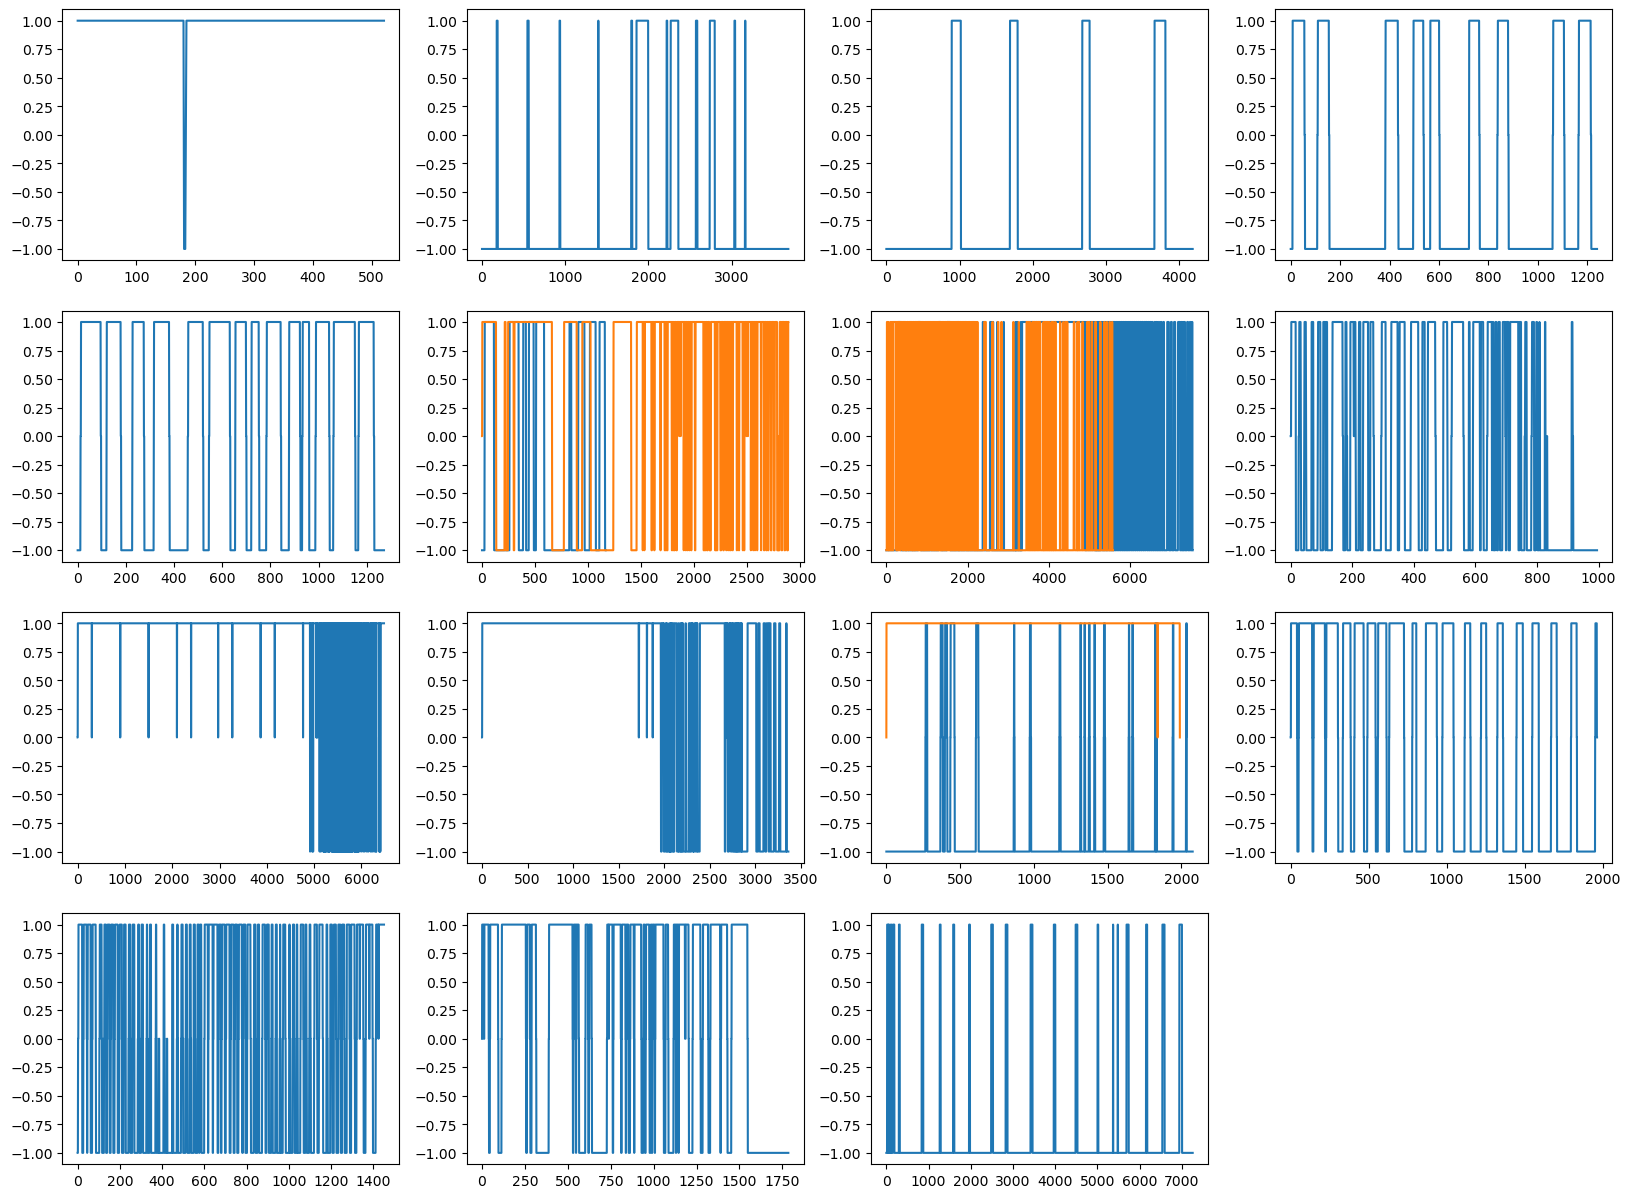

In [10]:
plt.figure(figsize=(20, 15))
for i in range(Patient_num):
    plt.subplot(4, 4, i+1)
    for j in range(len(data_list[i])):
        data_ann = data_list[i][j]['annotation']
        x_temp = np.arange(len(data_ann))
        plt.plot(x_temp, data_ann)

plt.show()

In [11]:
Patient_ID

array([  258,  8889,  9578, 10158,  5804,  6175, 10418, 10591, 11333,
        5371,  4456,  6563, 10020,  6514, 11580], dtype=int64)

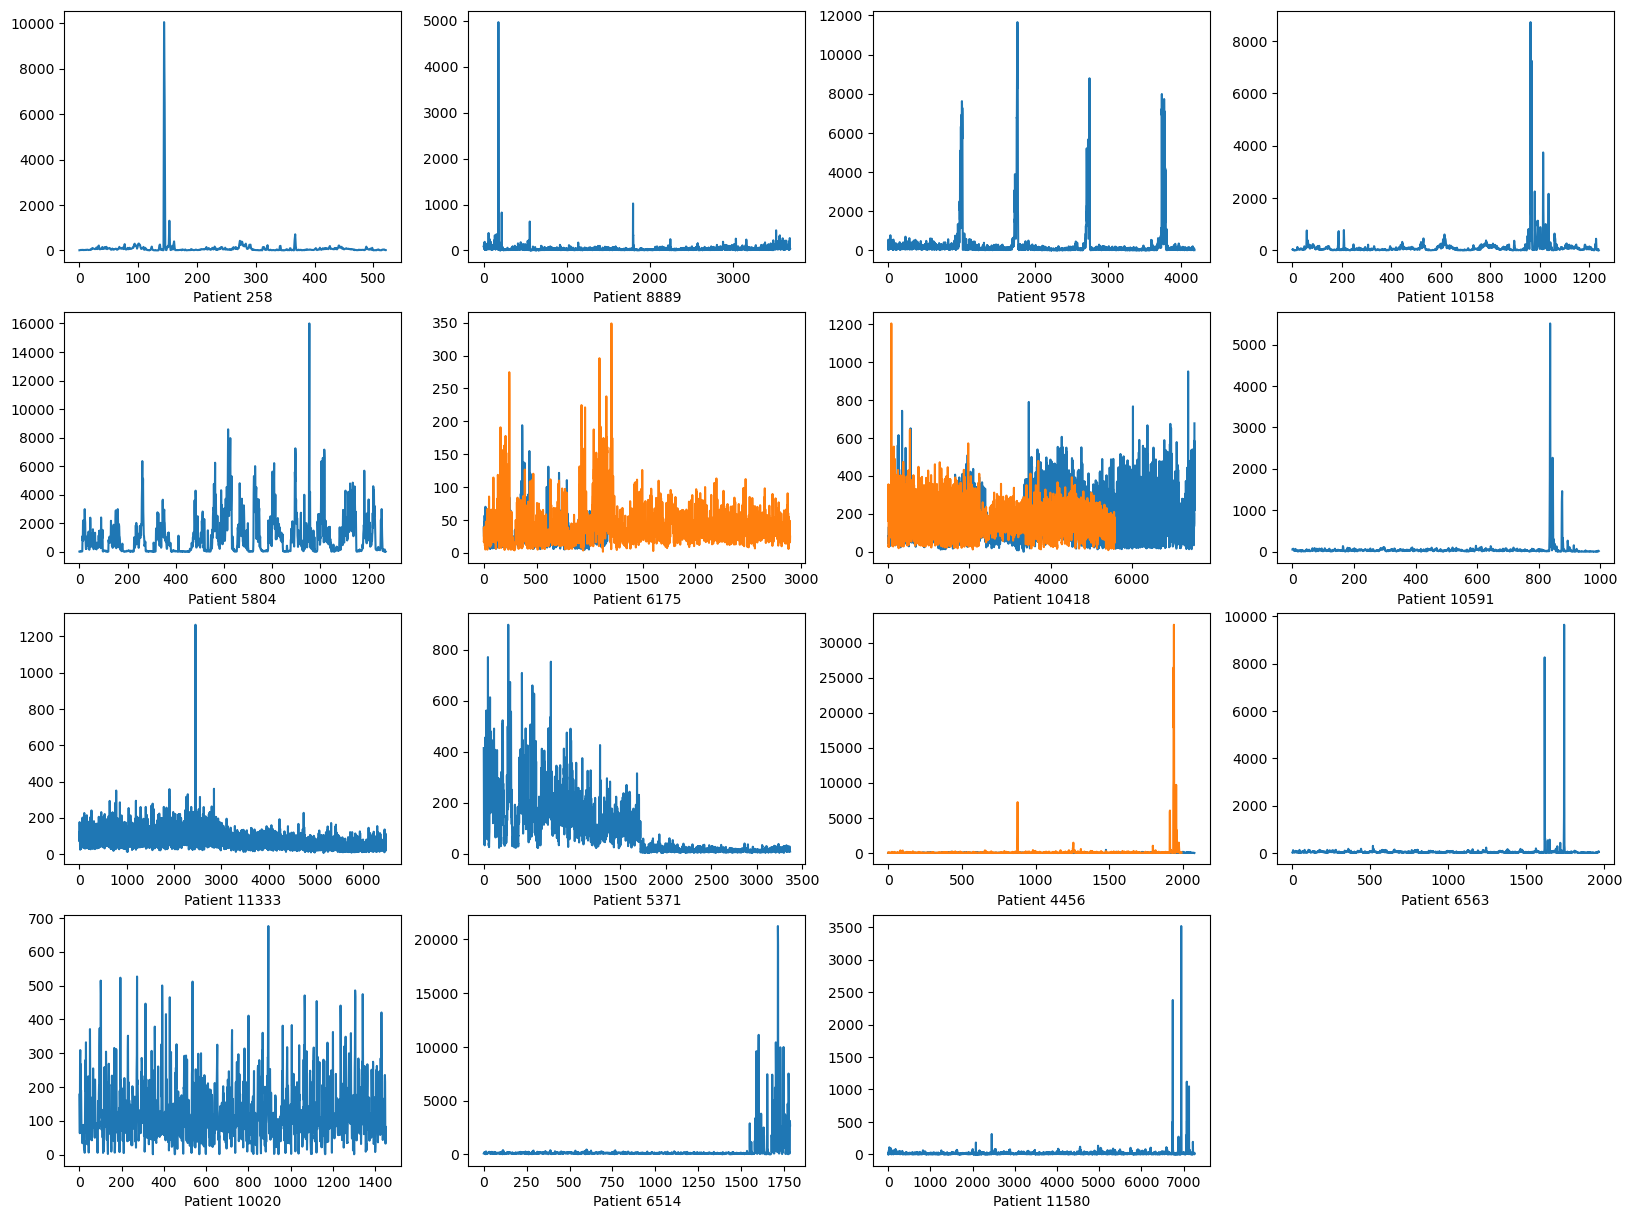

In [12]:
plt.figure(figsize=(20, 15))
for i in range(Patient_num):
    plt.subplot(4, 4, i+1)
    plt.xlabel("Patient "+str(Patient_ID[i]))
    for j in range(len(data_list[i])):
        data_ann = data_list[i][j][features[150]]
        x_temp = np.arange(len(data_ann))
        plt.plot(x_temp, data_ann)
        
plt.show()

In [13]:
X_anno = np.int32(data["annotation"].values).reshape(-1, 1)
X = data.iloc[:, 2:].values

X_scaled = StandardScaler().fit_transform(X)

In [14]:
# X_scaled = np.zeros(X.shape)
# for i in range(15):
#     for j in range(len(data_list[i])):
#         index = data_list[i][j].index
#         X_search = X[index, :]
#         scaler = StandardScaler().fit(X_search)
#         X_search = scaler.transform(X_search)
#         X_scaled[index, :] = X_search

In [15]:
def get_ts(X, data_list):
    num_ts = len(data_list)
    ts = []
    for i in range(num_ts):
        ts.append(X[data_list[i][0].index, :])
    ts.append(X[data_list[5][1].index, :])
    ts.append(X[data_list[6][1].index, :])
    ts.append(X[data_list[10][1].index, :])
    ts = to_time_series_dataset(ts)
    return ts

def get_subplots(ts, channel=0, label=None):
    
    for i in range(18):
        plt.subplot(4, 5, i+1)
        if(len(ts.shape)==2):
            plt.plot(ts[i, :])
        else:
            plt.plot(ts[i, :, channel])
    
    plt.show()

    if label != None:
        print("test")

In [16]:
ts = get_ts(X_anno, data_list)

In [ ]:
# distance = np.zeros([18, 18])
# for i in range(18):
#     for j in range(i, 18):
#         distance[i, j] = distance[j, i] = dtw(ts[i], ts[j])
# plt.figure(figsize=(20, 15))
# sns.heatmap(distance, annot=True, fmt='.0f')

In [50]:
y_pred_list = []
silhouette_list = []

In [51]:
ts = get_ts(X_anno, data_list)
n_clusters = [3, 4, 5]
for i in n_clusters:
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="dtw", verbose=False, random_state=random_state, n_jobs=8)
    y_pred = kmeans.fit_predict(ts)
    
    y_pred_list.append(y_pred)
    silhouette_list.append(silhouette_score(ts, y_pred, metric="dtw"))
    
    print("pred: ", y_pred)
    print("silhouette: ", silhouette_list[-1])
    print('-'*20)

pred:  [2 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 2]
silhouette:  0.46031435250633457
--------------------
pred:  [2 1 1 1 1 1 0 3 3 3 1 1 0 3 1 3 0 2]
silhouette:  0.2862543314822218
--------------------
pred:  [2 1 1 1 1 1 0 3 3 3 4 4 0 4 4 3 0 2]
silhouette:  0.27160585263635034
--------------------


In [52]:
ts = get_ts(X_scaled, data_list)
n_clusters = [3, 4, 5]
for i in n_clusters:
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="dtw", verbose=False, random_state=random_state, n_jobs=8)
    y_pred = kmeans.fit_predict(ts)
    
    y_pred_list.append(y_pred)
    silhouette_list.append(silhouette_score(ts, y_pred, metric="dtw"))
    
    print("pred: ", y_pred)
    print("silhouette: ", silhouette_list[-1])
    print('-'*20)

pred:  [0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
silhouette:  -0.08612086316980372
--------------------
pred:  [0 0 0 1 0 3 0 0 0 3 0 2 0 0 3 0 0 3]
silhouette:  -0.08168480299086818
--------------------
pred:  [0 0 0 1 0 3 0 0 0 3 0 2 0 0 4 3 0 3]
silhouette:  -0.06213348642441568
--------------------


In [53]:
clf_etc = ExtraTreesClassifier(random_state=random_state).fit(X_scaled, X_anno.reshape(-1)) # fit the model
feature_importances = clf_etc.feature_importances_  # get the feature importance

important_feature_indices = np.argsort(feature_importances)   # sort the feature importance

num_feature_list = [180, 120, 72, 36, 18, 1]

for num_feature in num_feature_list:
    important_feature_indices_selected = important_feature_indices[-num_feature:]   # select the most important features  
    X_selected = X_scaled[:, important_feature_indices_selected]
    ts = get_ts(X_selected, data_list)

    n_clusters = [3, 4, 5]
    for i in n_clusters:
        kmeans = TimeSeriesKMeans(n_clusters=i, metric="dtw", verbose=False, random_state=random_state, n_jobs=8)
        y_pred = kmeans.fit_predict(ts)
        
        y_pred_list.append(y_pred)
        silhouette_list.append(silhouette_score(ts, y_pred, metric="dtw"))
        
        print("pred: ", y_pred)
        print("silhouette: ", silhouette_list[-1])
        print('-'*20)

pred:  [0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
silhouette:  -0.12921998317672412
--------------------
pred:  [0 0 0 1 0 0 0 0 3 0 0 2 0 0 0 0 0 0]
silhouette:  -0.11400995784053308
--------------------
pred:  [0 0 0 1 0 0 0 0 3 0 0 2 0 0 4 0 0 0]
silhouette:  -0.082802247799097
--------------------
pred:  [0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
silhouette:  -0.16444841911283953
--------------------
pred:  [0 0 0 1 0 0 0 0 2 3 0 0 0 0 0 0 0 0]
silhouette:  -0.14166263928089423
--------------------
pred:  [0 0 0 1 0 0 0 0 2 3 0 0 0 0 4 0 0 0]
silhouette:  -0.10496669236029306
--------------------
pred:  [2 0 0 1 0 0 0 0 2 1 1 0 0 0 0 0 0 2]
silhouette:  -0.025794820429227462
--------------------
pred:  [2 0 0 1 0 0 0 0 2 3 1 0 0 0 0 0 0 2]
silhouette:  -0.09955851644578793
--------------------
pred:  [0 0 0 1 4 4 0 0 2 3 1 0 0 0 4 0 0 2]
silhouette:  -0.07460184231413271
--------------------
pred:  [0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
silhouette:  -0.1791391850277711
--------------------
pr

In [54]:
num_feature_list = [360, 180, 120, 72, 36, 18, 1]

for num_feature in num_feature_list:
    pca = PCA(num_feature).fit(X_scaled)
    X_selected = pca.transform(X_scaled)
    ts = get_ts(X_selected, data_list)

    n_clusters = [3, 4, 5]
    for i in n_clusters:
        kmeans = TimeSeriesKMeans(n_clusters=i, metric="dtw", verbose=False, random_state=random_state, n_jobs=8)
        y_pred = kmeans.fit_predict(ts)
        
        y_pred_list.append(y_pred)
        silhouette_list.append(silhouette_score(ts, y_pred, metric="dtw"))
        
        print("pred: ", y_pred)
        print("silhouette: ", silhouette_list[-1])
        print('-'*20)

pred:  [0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
silhouette:  -0.08612086316980369
--------------------
pred:  [0 0 0 1 0 3 0 0 0 3 0 2 0 0 3 0 0 3]
silhouette:  -0.0816848029908682
--------------------
pred:  [0 0 0 1 0 3 0 0 0 3 0 2 0 0 4 3 0 3]
silhouette:  -0.062133486424415706
--------------------
pred:  [0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
silhouette:  -0.08474914345379578
--------------------
pred:  [0 0 0 1 0 3 0 0 0 3 0 2 0 0 3 0 0 3]
silhouette:  -0.08036598009530999
--------------------
pred:  [0 0 0 1 0 3 0 0 0 3 0 2 0 0 4 3 0 3]
silhouette:  -0.06153309420809429
--------------------
pred:  [0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
silhouette:  -0.08668852237314842
--------------------
pred:  [0 0 0 1 0 3 0 0 0 0 0 2 0 0 3 0 0 3]
silhouette:  -0.09175576576003465
--------------------
pred:  [0 0 0 1 0 3 0 0 0 0 0 2 0 0 4 3 0 3]
silhouette:  -0.0953452477608683
--------------------
pred:  [0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
silhouette:  -0.073022761618245
--------------------
pre

In [59]:
silhouette_df = pd.DataFrame(silhouette_list)

In [62]:
#silhouette_df.to_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\silhouette.csv', index=False)

In [64]:
np.argmax(silhouette_df)

23

In [66]:
silhouette_df.loc[23]

0    0.58955
Name: 23, dtype: float64

In [67]:
y_pred_list[23]

array([2, 2, 4, 2, 1, 2, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 0], dtype=int64)

In [69]:
y_pred_df = pd.DataFrame(y_pred_list)

In [70]:
#y_pred_df.to_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\cluster.csv', index=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,0,2
1,2,1,1,1,1,1,0,3,3,3,1,1,0,3,1,3,0,2
2,2,1,1,1,1,1,0,3,3,3,4,4,0,4,4,3,0,2
3,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0
4,0,0,0,1,0,3,0,0,0,3,0,2,0,0,3,0,0,3
5,0,0,0,1,0,3,0,0,0,3,0,2,0,0,4,3,0,3
6,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,3,0,0,2,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,3,0,0,2,0,0,4,0,0,0
9,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [108]:
y_pred_best = y_pred_list[23]

important_feature_indices_selected = important_feature_indices[-1:]   # select the most important features  
X_selected = X_scaled[:, important_feature_indices_selected]
ts = get_ts(X_selected, data_list)

In [113]:
y_pred_best

array([2, 2, 4, 2, 1, 2, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 0], dtype=int64)

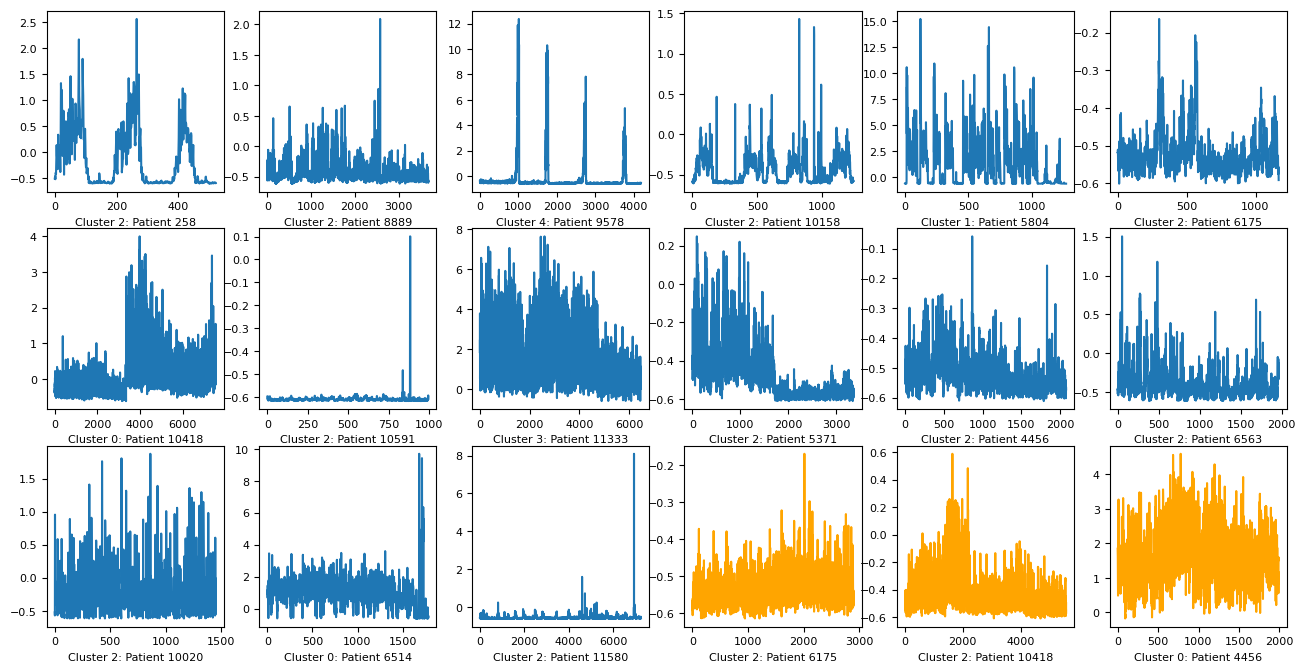

In [114]:
plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 8})

for i in range(18):
    plt.subplot(3, 6, i+1)
    if i < 15:
        plt.plot(ts[i][:, 0])
    else:
        plt.plot(ts[i][:, 0], c='orange')
        
    if i < 15:
        patient_idx_str = str(Patient_ID[i])
    elif i==15:
        patient_idx_str = str(Patient_ID[5])
    elif i==16:
        patient_idx_str = str(Patient_ID[6])
    elif i==17:
        patient_idx_str = str(Patient_ID[10])
    cluster_str = str(y_pred[i])
    plt.xlabel("Cluster {1}: Patient {0}".format(patient_idx_str, y_pred_best[i]))

In [ ]:
# plt.figure(figsize=(25, 20))
# for i in range(18):
#     plt.subplot(5, 4, i+1)
#     plt.plot(ts[i][:, 0])
#     if i < 15:
#         patient_idx_str = str(i)
#     elif i==15:
#         patient_idx_str = str(5)
#     elif i==16:
#         patient_idx_str = str(6)
#     elif i==16:
#         patient_idx_str = str(10)
#     cluster_str = str(y_pred[i])
#     plt.xlabel("{} (C{})".format(patient_idx_str, cluster_str))